In [3]:
import os
import numpy as np
import pandas as pd
import io
import requests
from fred import Fred
from string import punctuation

import matplotlib.pyplot as plt

%matplotlib inline

# Get data

In [427]:
# fr = Fred(api_key='abcdefghijklmnopqrstuvwxyz123456',response_type='dict')

- Can see if we can use API to get data

**What data do we need?**
- GDP by states by industry: https://www.bea.gov/system/files/2020-01/qgdpstate0120_2.pdf
- Employmnet by states by industry:
    - In order to get the data, we probably need to get the employment data by industry from each states' website.
        - NY: https://labor.ny.gov/stats/2016-2026-Statewide-and-Regional-Long-Term-Industry-Projections.xlsx
        - NJ: https://www.nj.gov/labor/lpa/employ/indoccpj/20162026%20Industry%20Employment%20Projections%20Reports.xlsx
        - ...so the 2016-2026 employment projection is avaliable on each states websites
        
- Labor Productivity by states by industry:
    - Private nonfarm productivity and costs by state and region: https://www.bls.gov/lpc/lpc-by-state-and-region.xlsx
    - https://www.bls.gov/opub/mlr/2019/article/bls-publishes-experimental-state-level-labor-productivity-measures.htm
    - industry level:

**What is our methodology?**
- We first want to 

### Gross Output by Industry

In [4]:
data_dir = os.path.join(os.getcwd(), "data/covideco_Quarterly.txt")

In [5]:
go_by_industry = pd.read_csv(data_dir,sep="\t")

**Notes:**
- Data Source: Gross Output by Industry: Gross Output by Industry, Billions of Dollars, Seasonally Adjusted at Annual Rates
https://fred.stlouisfed.org/release/tables?rid=331&eid=1993#

- In millions


# Initial Analysis

In [6]:
go_by_industry.shape

(59, 33)

In [7]:
go_by_industry.DATE.max()

'2019-07-01'

In [8]:
go_by_industry.DATE.min()

'2005-01-01'

In [9]:
go_by_industry.columns

Index(['DATE', 'GOAER', 'GOAERAF', 'GOAF', 'GOAFH', 'GOAI', 'GOAWMS', 'GOC',
       'GOES', 'GOESHS', 'GOF', 'GOFI', 'GOFIRL', 'GOG', 'GOGPI', 'GOHCSA',
       'GOI', 'GOM', 'GOMA', 'GOMCE', 'GOMD', 'GOMN', 'GOOSEG', 'GOPBS',
       'GOPI', 'GOPST', 'GOR', 'GORL', 'GOSL', 'GOSPI', 'GOT', 'GOU', 'GOW'],
      dtype='object')

In [10]:
go_by_industry.head()

,DATE,GOAER,GOAERAF,GOAF,GOAFH,GOAI,GOAWMS,GOC,GOES,GOESHS,...,GOPBS,GOPI,GOPST,GOR,GORL,GOSL,GOSPI,GOT,GOU,GOW
0,2005-01-01,195200,830300,635099,297482,22835859,559735,1238713,191383,1544232,...,2214244,20263503,1310749,1218101,2414652,1731382,13713477,724612,381224,1087905
1,2005-04-01,199654,850167,650513,298167,23225964,576804,1269902,193184,1564898,...,2261537,20629694,1335294,1233556,2479923,1753076,13956891,744427,393619,1091728
2,2005-07-01,203031,861411,658379,299068,23733860,583213,1302808,196086,1593299,...,2294539,21091301,1350535,1248641,2534816,1782789,14260921,762510,433039,1106462
3,2005-10-01,210163,878097,667933,299297,24256100,601280,1337151,199854,1614902,...,2354618,21574195,1388096,1258552,2562990,1814950,14490669,778906,456852,1144844
4,2006-01-01,216256,899096,682840,295945,24604791,615663,1371165,205626,1639224,...,2394078,21868521,1406098,1294025,2586824,1836871,14731273,804842,428646,1169017


**Notes:**

- Private Industries: 
    - `GOAFH`: Agriculture, Forestry, Fishing, and Hunting 
    - `GOM`: Mining
    - `GOU`: Utilities
    - `GOC`: Construction
    - Manufacturing:
        - `GOMD`: Durable Goods
        - `GOMN`: Nondurable Goods
    - `GOW`: Wholesale Trade
    - `GOR`: Retail Trade
    - `GOT`: Transportation and Warehousing
    - `GOI`: Information
    - `GOFIRL`: Finance, Insurance, Real Estate, Rental, and Leasing
        - `GOFI`: Finance and Insurance
        - `GORL`: Real Estate and Rental and Leasing
    - `GOPBS`: Professional and Business Services
        - `GOPST`: Professional, Scientific, and Technical Services
        - `GOMCE`: Management of Companies and Enterprises
        - `GOAWMS`: Administrative and Waste Management Services
    - `GOESHS`: Educational Services, Health Care,and Social Assistance
        - `GOES`: Educational Services
        - `GOHCSA`: Health Care and Social Assistance
    - `GOAERAF`: Arts, Entertainment, Recreation, Accommodation, and Food Services 
        - `GOAER`: Arts, Entertainment, and Recreation
        - `GOAF`: Accommodation and Food Services
    - `GOOSEG`: Other Services, Except Government
- `GOG`: Government
    - `GOF`: Federal
    - `GOSL`: State and Local
- Addenda:
    - `GOSPI`: Gross Output of Private Services-Producing Industries




- `GOAI`: Gross Output of All Industries


**Categories**
- private industry: `GOAFH`, `GOM`, `GOU`, `GOC`, `GOMD`, `GOMN`, `GOW`, `GOR`, `GOT`, `GOI`, `GOFI`, `GORL`, `GOPST`, `GOMCE`, `GOAWMS`, `GOES`, `GOHCSA`, `GOAER`, `GOAF`, `GOOSEG`

- govt : `GOF`, `GOSL`

In [435]:
private_ind = ['GOAFH', 'GOM', 'GOU', 
               'GOC', 'GOMD', 'GOMN',
               'GOW', 'GOR', 'GOT',
               'GOI', 'GOFI', 'GORL',
               'GOPST', 'GOMCE', 'GOAWMS', 
               'GOES', 'GOHCSA', 'GOAER',
               'GOAF', 'GOOSEG']

In [436]:
govt = ['GOF','GOSL']

In [437]:
go_by_industry['DATE'] = pd.to_datetime(go_by_industry['DATE'])

In [438]:
go_by_industry['quarter'] = go_by_industry['DATE'].dt.quarter

In [439]:
go_by_industry['year'] = go_by_industry['DATE'].dt.year

#### Gross Outputs of All Industry Includes: private industry and govt

In [440]:
test = go_by_industry[(go_by_industry.year == 2019)&(go_by_industry.quarter == 1)]

In [441]:
test[private_ind+govt].sum(axis=1)

56    37324034
dtype: int64

In [442]:
test['GOSPI']

56    24305535
Name: GOSPI, dtype: int64

In [443]:
test['GOAI']

56    37324032
Name: GOAI, dtype: int64

In [444]:
go_by_industry.dtypes[:5]

DATE       datetime64[ns]
GOAER               int64
GOAERAF             int64
GOAF                int64
GOAFH               int64
dtype: object

In [445]:
go_by_industry['DATE'] = pd.to_datetime(go_by_industry['DATE'])

In [446]:
go_by_industry = go_by_industry.set_index('DATE')

In [447]:
test_cols = ['GOHCSA','GOAERAF','GOT','GOR','GOAFH','GOFI']

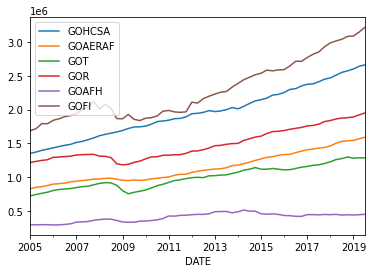

In [448]:
go_by_industry[test_cols].plot()

## Private Industry

In [449]:
go_private_ind = go_by_industry[private_ind+['year','quarter']]

In [450]:
go_private_ind = go_private_ind.reset_index()

In [451]:
go_private_ind_1st_qt = go_private_ind[go_private_ind.quarter == 1]

In [452]:
go_private_ind_1st_qt = go_private_ind_1st_qt.drop(columns=['DATE'])

In [453]:
go_private_ind_1st_qt = go_private_ind_1st_qt.drop(columns=['quarter'])

In [454]:
go_private_ind_1st_qt = go_private_ind_1st_qt.set_index(['year'])

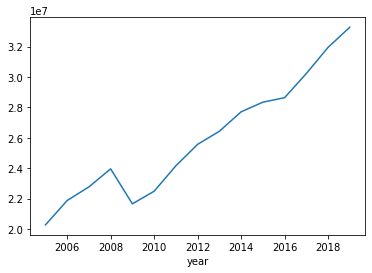

In [455]:
fig,ax = plt.subplots()
go_private_ind_1st_qt.sum(axis=1).plot()


## All industries 

In [456]:
def get_all_industry_go_qt(df,year,quarter):
    go_all_industries = df[govt+private_ind+['year', 'quarter']]
    all_indus_yr_qt = go_all_industries[
                        (go_all_industries.year == year) & (go_all_industries.quarter == quarter)
                                     ].reset_index().drop(columns='DATE')
    all_indus_yr_qt = all_indus_yr_qt.drop(columns=['year','quarter']).T
    return all_indus_yr_qt

In [457]:
all_indus_2019_q1 = get_all_industry_go_qt(go_by_industry, 2019, 1)

In [458]:
all_indus_2019_q2 = get_all_industry_go_qt(go_by_industry, 2019, 2)

**Notes:**
- We want to see how GDP would change in terms of Quartine times.
- Need to have a model to esimate cases change gaven quartine time (https://www.nytimes.com/interactive/2020/03/25/opinion/coronavirus-trump-reopen-america.html?referringSource=articleShare#methodology)
- and then to research on which industries would be most affected by quatentine, adjust growth in GDP (https://www.marketwatch.com/story/these-industries-are-more-likely-to-shed-jobs-if-the-coronavirus-pandemic-worsens-but-one-sector-looks-recession-proof-2020-03-11)
    - Arts, Enterainment, Recreation
    

# Q1. Estimates of deterioration to GDP due to quarantining 

**Formula**  

- unquarantine_change_rate = SUM(proportion_of_state_sick * proportion_of_inds_in_state), for each states
    - **Note:** proportion of ppl get sick who are in labor force (current unemployment rate, by age)

- Depending on how much data we have, we could put _shock_ in the formula (financial crsis, hospital bed overflow) 
    
- quarantine_change_rate (come back to this)
    - we should not assume quarantine rate for all the states, might need diff quarantine states
    - Jenn: current quarantine measures for each states
    - WFH possibility will diff from industry
    - layoffs

- Health care cost 

In [481]:
def gdp_due_to_quarantine(df, durations, **sectors_pct_change):
    '''
    Parameters:
    - duration, in weeks, 14 weeks in a quarter
    - sectors_pct_change, quarterly
    

    '''
#     print(sectors_pct_change)
    
    df_cal = df.copy()
    for k,v in sectors_pct_change.items():
        
        quarterly_chg_rate = (v*durations)/14
        
        df_cal[k] = df_cal[k]*(1+quarterly_chg_rate)
        
    return df_cal.sum(axis = 1).values[0]

### two weeks strict quarantine
- Which industry hit the most? how much will the gross output go down?


#### What does 2019 Q2 outputs looks like?

In [349]:
all_indus_2019_q2/all_indus_2019_q2.sum()

,0
GOF,0.033303
GOSL,0.075483
GOAFH,0.011855
GOM,0.015723
GOU,0.013086
GOC,0.043841
GOMD,0.086063
GOMN,0.080639
GOW,0.055649
GOR,0.050965


In [367]:
all_indus_2019_q2 = all_indus_2019_q2.sort_values(by = 0) 

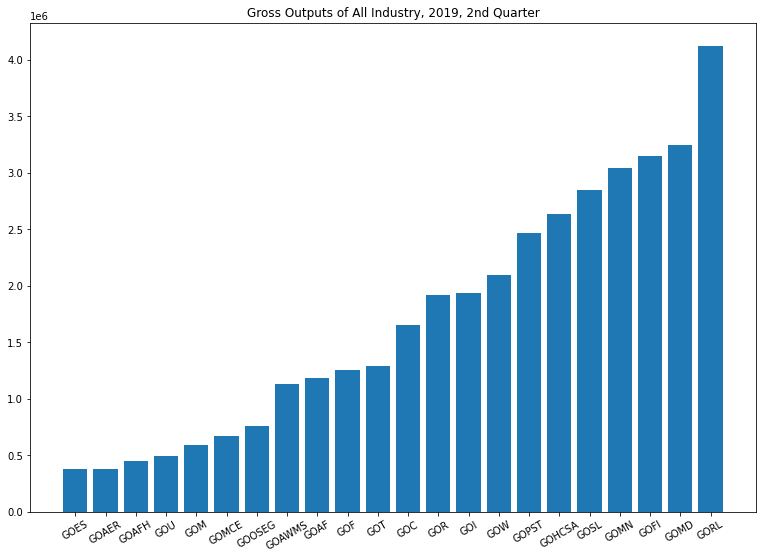

In [391]:
fig, ax = plt.subplots(figsize = (13,9))
ax.bar(x = all_indus_2019_q2.index, 
       height = all_indus_2019_q2[0])
t =plt.xticks(rotation =30)
tl = ax.set_title("Gross Outputs of All Industry, 2019, 2nd Quarter")

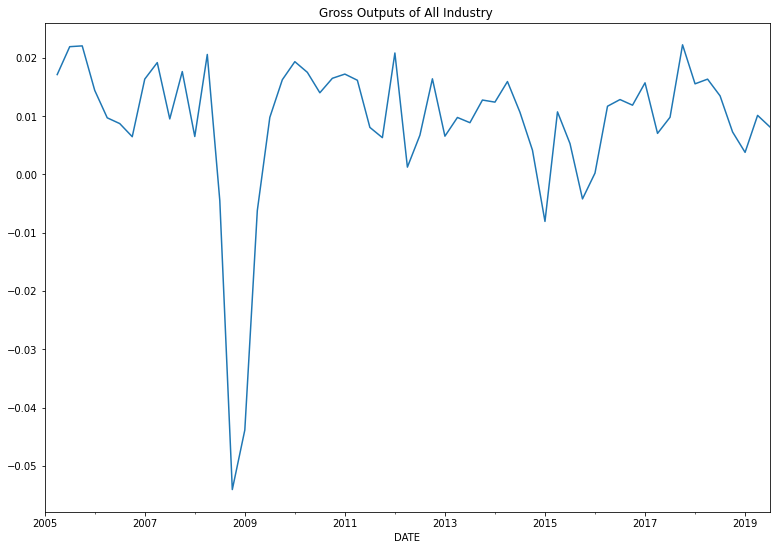

In [395]:
go_by_industry['GOAI'].pct_change().plot(figsize = (13,9))
tl = plt.title("Gross Outputs of All Industry ")

### Calculate quarantine GDP (given assumptions)

https://www.statista.com/topics/6139/covid-19-impact-on-the-global-economy/

**Industries Might be hit**
- `GOAF` : Accommodation and food services - down 60%
- `GOMD`: Manufacturing Durable goods - Durable goods are those goods that don’t wear out quickly and last over a long period. Examples of durable goods include land, cars, and appliances.

- `GOMN`: Manufacturing Nondurable goods - Non-durable goods or soft goods are those goods that have a short life cycle. They are used up all at once or have a lifespan of fewer than three years. For example light bulbs, paper products, and food products.
- `GOR`: Retail Trade
- `GOT`: Transportation and Warehousing: air transportation https://www.statista.com/statistics/1104036/novel-coronavirus-weekly-flights-change-airlines-region/
- `GOU`: Utilities: shale oil

https://www.marketwatch.com/story/these-industries-are-more-likely-to-shed-jobs-if-the-coronavirus-pandemic-worsens-but-one-sector-looks-recession-proof-2020-03-11


In [409]:
private_ind

['GOAFH',
 'GOM',
 'GOU',
 'GOC',
 'GOMD',
 'GOMN',
 'GOW',
 'GOR',
 'GOT',
 'GOI',
 'GOFI',
 'GORL',
 'GOPST',
 'GOMCE',
 'GOAWMS',
 'GOES',
 'GOHCSA',
 'GOAER',
 'GOAF',
 'GOOSEG']

In [504]:
np.linspace(-1,0,11)

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ])

In [510]:
gdp_ind = []
for j in np.linspace(-1,0,11):
    private_ind_neg_pct = {'GOAF': j,'GOMD': -0.2 ,'GOMN': -0.4,'GOMN': 0,'GOR': -0.5,'GOT': -0.4}
    gdp =[]
    for i in range(2,9):
        gdp_sub = gdp_due_to_quarantine(df=all_indus_2019_q2.T, durations= i, **private_ind_neg_pct)
        gdp.append([i,j,gdp_sub])
        test_gdp_df = pd.DataFrame(gdp, columns= ['weeks','pct_chg','gdp'])
    gdp_ind.append(test_gdp_df)

In [511]:
pd.concat(gdp_ind)

,weeks,pct_chg,gdp
0,2,-1.0,3.722765e+07
1,3,-1.0,3.699116e+07
2,4,-1.0,3.675467e+07
3,5,-1.0,3.651819e+07
4,6,-1.0,3.628170e+07
...,...,...,...
2,4,0.0,3.709366e+07
3,5,0.0,3.694192e+07
4,6,0.0,3.679018e+07
5,7,0.0,3.663844e+07


In [498]:
test_gdp_df = pd.DataFrame.from_dict(gdp,orient= 'index', columns= ['gdp'])

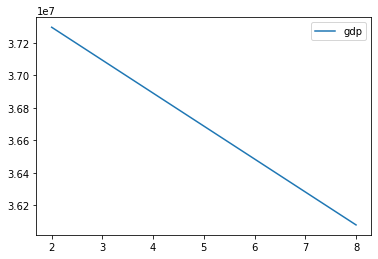

In [499]:
test_gdp_df.plot()

In [482]:
gdp_2wk = gdp_due_to_quarantine(df=all_indus_2019_q2.T, durations=2, **private_ind_neg_pct)

In [483]:
gdp_2wk

37295444.94285714

In [484]:
(gdp_2wk - all_indus_2019_q2.sum(axis = 0))/all_indus_2019_q2.sum(axis = 0)

0   -0.010747
dtype: float64

# Q2: estimates of deterioration to GDP due to  illness in workforce 

**Data:**
- Employment by major industry sector: https://www.bls.gov/emp/tables/employment-by-major-industry-sector.htm

**Methdology**
- https://www.commonwealthfund.org/press-release/2005/lost-labor-time-costs-us-260-billion-each-year
- https://www.oecd-ilibrary.org/docserver/health_glance_eur-2016-4-en.pdf?expires=1585332775&id=id&accname=guest&checksum=CAC0703A9D5571BA1C8276C6045FBA20

- Okun's Law: Economic Growth And Unemployment: https://www.investopedia.com/articles/economics/12/okuns-law.asp
- The law has indeed evolved over time to fit the current economic climate and employment trends. One version of Okun's law has stated very simply that when unemployment falls by 1%, GNP rises by 3%. Another version of Okun's law focuses on a relationship between unemployment and GDP, whereby a percentage increase in unemployment causes a 2% fall in GDP.

- Looking at BLS data, and join to industries, and to see how many worker is illed
- 2,4 weeks, and labor shocks 
- longer period of time, 

- number of ppl in industry and where they live, to see transmission, and also to see healthcare cost on that

**E.g. for a 2 weeks shut down, we want to first use the epidemiology model to measure how many people will be transmitted after two weeks, and then estimate what is the labor loss because of illness. Then to relate the labor loss to gross output changes in industry**



In [36]:
job_data = pd.read_excel(os.path.join(os.getcwd(),"data/industry.xlsx"), sheet_name= 1)

## Prepare data
- In thousands


In [223]:
job_data_sub = job_data.iloc[:,[0,1,2,3]]

In [224]:
job_data_sub.columns = job_data_sub.loc[1]

In [225]:
job_data_sub = job_data_sub.loc[2:30]

In [226]:
job_data_sub.index.values

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [227]:
job_data_sub = job_data_sub.drop(job_data_sub.index[[1,3,8,23,27]])

In [228]:
job_data_sub.columns

Float64Index([nan, 2008.0, 2018.0, 2028.0], dtype='float64', name=1)

In [229]:
job_data_sub = job_data_sub.set_index(np.nan)

In [230]:
job_data_sub.index.name = "industry"

In [231]:
job_data_sub.columns.name = ""

In [232]:
job_data_sub.index = job_data_sub.index.str.strip(
                                      ).str.lower(
                                      ).str.replace(r"\(.*\)","").str.replace(" ","_"
                                                                ).str.replace(",","").str.replace("-","")

In [233]:
job_data_sub.columns = job_data_sub.columns.astype(int)

In [234]:
job_data_sub[2019] = job_data_sub[2018] + (job_data_sub[2028]-job_data_sub[2018])/10

In [237]:
job_data_sub[2019]

industry
total                                              161878
nonagriculture_wage_and_salary                     150590
goodsproducing_excluding_agriculture              20682.4
mining                                             687.76
construction                                      7370.05
manufacturing                                     12624.6
servicesproviding_excluding_special_industries     129907
utilities                                          552.86
wholesale_trade                                   5842.65
retail_trade                                      15817.7
transportation_and_warehousing                    5451.33
information                                       2828.66
financial_activities                              8596.86
professional_and_business_services                21165.7
educational_services                              3774.85
health_care_and_social_assistance                 20278.9
leisure_and_hospitality                           16504.1
other

In [248]:
def labor_after_illness(df, **pct_of_illness_by_indistry):
    df_cal = df.copy()
#     print(pct_of_illness_by_indistry)
    for k,v in pct_of_illness_by_indistry.items():
        df_cal[k] = df_cal[k]*(1+v)
        
    return df_cal

In [249]:
labor_after_illness(df=job_data_sub[2019], total = -0.03)

industry
total                                              157021
nonagriculture_wage_and_salary                     150590
goodsproducing_excluding_agriculture              20682.4
mining                                             687.76
construction                                      7370.05
manufacturing                                     12624.6
servicesproviding_excluding_special_industries     129907
utilities                                          552.86
wholesale_trade                                   5842.65
retail_trade                                      15817.7
transportation_and_warehousing                    5451.33
information                                       2828.66
financial_activities                              8596.86
professional_and_business_services                21165.7
educational_services                              3774.85
health_care_and_social_assistance                 20278.9
leisure_and_hospitality                           16504.1
other

## Name consistency in labor data and GDP

In [253]:
go_private_ind_1st_qt.columns

Index(['GOAFH', 'GOM', 'GOU', 'GOC', 'GOMD', 'GOMN', 'GOW', 'GOR', 'GOT',
       'GOI', 'GOFI', 'GORL', 'GOPST', 'GOMCE', 'GOAWMS', 'GOES', 'GOHCSA',
       'GOAER', 'GOAF', 'GOOSEG'],
      dtype='object')

In [256]:
job_data_sub.index.sort_values()

Index(['agriculture_forestry_fishing_and_hunting', 'agriculture_selfemployed',
       'agriculture_wage_and_salary', 'construction', 'educational_services',
       'federal_government', 'financial_activities',
       'goodsproducing_excluding_agriculture',
       'health_care_and_social_assistance', 'information',
       'leisure_and_hospitality', 'manufacturing', 'mining',
       'nonagriculture_selfemployed', 'nonagriculture_wage_and_salary',
       'other_services', 'professional_and_business_services', 'retail_trade',
       'servicesproviding_excluding_special_industries',
       'state_and_local_government', 'total', 'transportation_and_warehousing',
       'utilities', 'wholesale_trade'],
      dtype='object', name='industry')

**Let's not using the abbreviations**

In [266]:
go_private_ind.columns

Index(['DATE', 'GOAFH', 'GOM', 'GOU', 'GOC', 'GOMD', 'GOMN', 'GOW', 'GOR',
       'GOT', 'GOI', 'GOFI', 'GORL', 'GOPST', 'GOMCE', 'GOAWMS', 'GOES',
       'GOHCSA', 'GOAER', 'GOAF', 'GOOSEG', 'year', 'quarter'],
      dtype='object')

In [268]:
name_l = ["date","agriculture_forestry_fishing_and_hunting","mining","utilities",
 "construction","manufacturing_durable","manufacturing_nondurable",
 "wholesale_trade","retail_trade","transportation_and_warehousing",
 "information","financial_activities_finance_and_insurance",
 "financial_activities_realestata_rental","professional_and_business_services_pst",
 "professional_and_business_services_mce","professional_and_business_services_awms",
 "educational_services_es","educational_services_hcsa",
 "leisure_and_hospitality_aer","leisure_and_hospitality_af","other_services","year","quarter"]

go_private_ind.columns = name_l

In [272]:
go_private_ind.T.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
date,2005-01-01 00:00:00,2005-04-01 00:00:00,2005-07-01 00:00:00,2005-10-01 00:00:00,2006-01-01 00:00:00,2006-04-01 00:00:00,2006-07-01 00:00:00,2006-10-01 00:00:00,2007-01-01 00:00:00,2007-04-01 00:00:00,...,2017-04-01 00:00:00,2017-07-01 00:00:00,2017-10-01 00:00:00,2018-01-01 00:00:00,2018-04-01 00:00:00,2018-07-01 00:00:00,2018-10-01 00:00:00,2019-01-01 00:00:00,2019-04-01 00:00:00,2019-07-01 00:00:00
agriculture_forestry_fishing_and_hunting,297482,298167,299068,299297,295945,297448,302535,312916,337269,340783,...,447996,444807,449954,447111,451511,441373,446565,442226,446933,452278
mining,342076,368341,404483,460913,444794,446291,452850,432936,435520,473142,...,482391,482533,542015,577521,618499,651507,647734,602995,592750,554612
utilities,381224,393619,433039,456852,428646,422226,427400,409544,439069,450598,...,495216,485940,496425,504565,510005,506050,516592,504622,493361,496721
construction,1238713,1269902,1302808,1337151,1371165,1368651,1346813,1327850,1333785,1347702,...,1544444,1543895,1563430,1583698,1607466,1624345,1618116,1650501,1652842,1663027


## Labor productivity data

labor productivity data: https://www.bls.gov/lpc/two_digit_sector_data.csv

- **labor productivity**: total_output/total_manhours

- labor productivity measures the hourly output of a country's economy. Specifically, it charts the amount of real gross domestic product (GDP) produced by an hour of labor. Growth in labor productivity depends on three main factors: saving and investment in physical capital, new technology, and human capital.
- **Factors of Production**: Factors of production are the inputs needed for the creation of a good or service. The factors of production include land, labor, entrepreneurship, and capital.
- https://www.bls.gov/opub/btn/volume-3/what-can-labor-productivity-tell-us-about-the-us-economy.htm
- 

In [556]:
def get_df_from_url(url):
    r = requests.get(url, stream=True).content
    return pd.read_csv(io.StringIO(r.decode('utf-8')))

In [557]:
url = ' https://www.bls.gov/lpc/two_digit_sector_data.csv'
labor_prod_df = get_df_from_url(url)

In [558]:
labor_prod_df['Year'].value_counts().head()

2018    8
2017    8
1988    8
1989    8
1990    8
Name: Year, dtype: int64

In [559]:
labor_prod_df[labor_prod_df['Year'] == 2018].shape

(8, 28)

In [560]:
labor_prod_df.isnull().sum()

Two Digit Sectors                              0
Year                                           0
Labor productivity (2007=100)                 96
Labor productivity (percent change)          101
Hours worked (2007=100)                        0
Hours worked (percent change)                  8
Labor compensation (Million $)                96
Labor compensation (percent change)          101
Hours worked (millions)                        0
Hours worked (percent change).1                8
Output (2007=100)                             96
Output (percent change)                      101
Implicit output deflator (2007=100)           96
Implicit output deflator (percent change)    101
Value of production (Million $)               96
Value of production (percent change)         101
Unit labor costs (2007=100)                   96
Unit labor costs (percent change)            101
Labor compensation (2007=100)                 96
Labor compensation (percent change).1        101
Hourly compensation 

In [561]:
labor_prod_df.columns = labor_prod_df.columns.str.strip(
                                  ).str.lower(
                                  ).str.replace(r"\(.*\)","").str.replace(" ","_"
                                                            ).str.replace(",","").str.replace("-","")

In [566]:
labor_prod_df = labor_prod_df.iloc[:,[0,1,2]]

In [575]:
labor_prod_df['two_digit_sectors'] = labor_prod_df.two_digit_sectors.str.strip(
                                                                  ).str.lower(
                                                                  ).str.replace(r"\(.*\)",""
                                                                  ).str.replace(" ","_"
                                                                  ).str.replace(",",""
                                                                  ).str.replace("-",""
                                                                  ).str.replace("__","_")

In [578]:
labor_prod_df = labor_prod_df.set_index(['two_digit_sectors','year'])

In [582]:
labor_prod_df.labor_productivity_.isnull().sum()

96

In [587]:
labor_prod_df.unstack().isnull().sum(axis = 1)/(labor_prod_df.unstack().shape[1])

two_digit_sectors
21_mining                                            0.0
22_utilities                                         0.0
42_wholesale_trade                                   0.0
4445_retail_trade                                    0.0
54_professional_scientific_and_technical_services    1.0
55_management_of_companies_and_enterprises           1.0
61_educational_services                              1.0
72_accommodation_and_food_services                   0.0
dtype: float64

**There is no labor productivity data in `54`,`55`,`61`**

- https://www.bea.gov/data/gdp/gdp-state
- 
    